<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/NeuralNetworks/NeuralNetworksClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

This is the practical class for Neural Networks in R. In this class, we will apply neural networks to the same problem as the last class, which was on association rule learning: the hiring of optimal telemarketers. Fist, we install and import all neural network libraries we are going to use. Next, we load our data.

In [ ]:
install.packages('neuralnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('NeuralNetTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('neuralnet')
library('NeuralNetTools')

In [ ]:
h <- read.csv('candidatos.csv',sep=',')

In [ ]:
head(h)

,X,Id,Apellido,Nombre,Propio,Padre,Madre,PIngFam,IngFam,Hijos,⋯,Conciente,Espiritual,Impulsivo,Desordenado,Temeroso,Vago,Apego,Empatia,Compasivo,VxH
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2001,2001,IEEDT,HXNNE,P,S,U,0.63543626,24067.7992,3,⋯,0.66820965,0.0712635,0.4320820,0.6290097,0.6371866,0.4142663,0.9931040,0.6354392,0.3917132,0.6680559
2,2002,2002,QBGGM,EFSDQ,S,S,S,0.04048093,888.6913,0,⋯,0.01280303,0.8834866,0.6356267,0.5468446,0.1612755,0.9786670,0.7558528,0.7264911,0.4026891,0.5772992
3,2003,2003,HYTBY,OXHIO,P,P,P,0.83330052,9538.7510,3,⋯,0.68629221,0.7884684,0.7590972,0.3675028,0.9329197,0.7309785,0.7376015,0.6763783,0.5326494,0.6649263
4,2004,2004,YGBVR,NROUL,P,P,S,0.05665509,36689.7745,0,⋯,0.38174567,0.4943618,0.5358783,0.8752060,0.4391167,0.0367856,0.4507340,0.7834669,0.3943883,0.4975534
5,2005,2005,GBKJI,XBTPE,U,U,S,0.87843791,15619.1058,0,⋯,0.17559079,0.4795508,0.5323704,0.2934754,0.3472154,0.6083721,0.5479184,0.7309708,0.6152700,0.6783669
6,2006,2006,TTYAA,LVRFW,S,P,P,0.38670005,18460.1819,4,⋯,0.24953534,0.3831869,0.9662643,0.6909347,0.8445829,0.4935160,0.1555895,0.3283420,0.3285059,0.9715845


In [ ]:
colnames(h)

[1] "X"            "Id"           "Apellido"     "Nombre"       "Propio"      
 [6] "Padre"        "Madre"        "PIngFam"      "IngFam"       "Hijos"       
[11] "Exitable"     "Extravagante" "Pesimista"    "Timido"       "Sentimental" 
[16] "Dependiente"  "Responsable"  "Capaz"        "Sociable"     "Servicial"   
[21] "Etico"        "Conciente"    "Espiritual"   "Impulsivo"    "Desordenado" 
[26] "Temeroso"     "Vago"         "Apego"        "Empatia"      "Compasivo"   
[31] "VxH"

Now, we will first transform the Propio, Padre and Madre fields to numeric fields. These indicate the maximum level of studies reached by the candidate, their father and their mother. There are three possibilities for each case: P (primary/elementary shool), S (secondary/high school) and U (university). The rest of the data need not be transformed, since neural networks (different from association rules) can take numeric values as inputs. 

In [ ]:
nPropio <- ifelse(h$Propio=='P',0,ifelse(h$Propio=='S',1,2))
nPadre <- ifelse(h$Padre=='P',0,ifelse(h$Padre=='S',1,2))
nMadre <-ifelse(h$Madre=='P',0,ifelse(h$Madre=='S',1,2))
h <- cbind(h,nPropio,nPadre,nMadre)

Now we divide on train and test. 

In [ ]:
x <- runif(nrow(h))
htrain <- h[which(x<0.7),]
htest <- h[which(x>=0.7),]

And we define the regression rule, meaning, which fields we are going to use for prediction and which field is the one we want to predict. 

In [ ]:
f = 'VxH ~ PIngFam + IngFam + Hijos + Exitable + Extravagante + Pesimista + Timido + Sentimental + Dependiente + Responsable + Capaz + Sociable + Servicial + Etico + Conciente + Espiritual + Impulsivo + Desordenado + Temeroso + Vago + Apego + Empatia + Compasivo + nPropio + nPadre + nMadre'

And we eliminate everything that is useless from the training data and we format VxH (the one we want to predict) to the last position of our network. 

In [ ]:
htrain_p <- htrain
htrain_p$X <- NULL
htrain_p$Id <- NULL
htrain_p$Apellido <- NULL
htrain_p$Nombre <- NULL
htrain_p$Propio <- NULL
htrain_p$Madre <- NULL
htrain_p$Padre <- NULL
htrain_p$VxH <- NULL
htrain_p <- cbind(htrain_p,htrain$VxH)
colnames(htrain_p)[27] <- "VxH"

Now we do the same for the test dataset. 

In [ ]:
htest_p <- htest
htest_p$X <- NULL
htest_p$Id <- NULL
htest_p$Apellido <- NULL
htest_p$Nombre <- NULL
htest_p$Propio <- NULL
htest_p$Madre <- NULL
htest_p$Padre <- NULL
htest_p$VxH <- NULL
htest_p <- cbind(htest_p,htest$VxH)
colnames(htest_p)[27] <- "VxH"

## First neural network: A simple perceptron
And now we can create and train the neural network, make our predictions, etc. 

In [ ]:
nn <- neuralnet(formula = f,data = htrain_p)

In [ ]:
pnn <- compute(nn,htest_p)

Now we see how the predictions compare to reality in a plot. Running this a few times, we will see how it really is very random, and most of the times we get a completely useless network that most likely converged to the average value of our target attribute. 

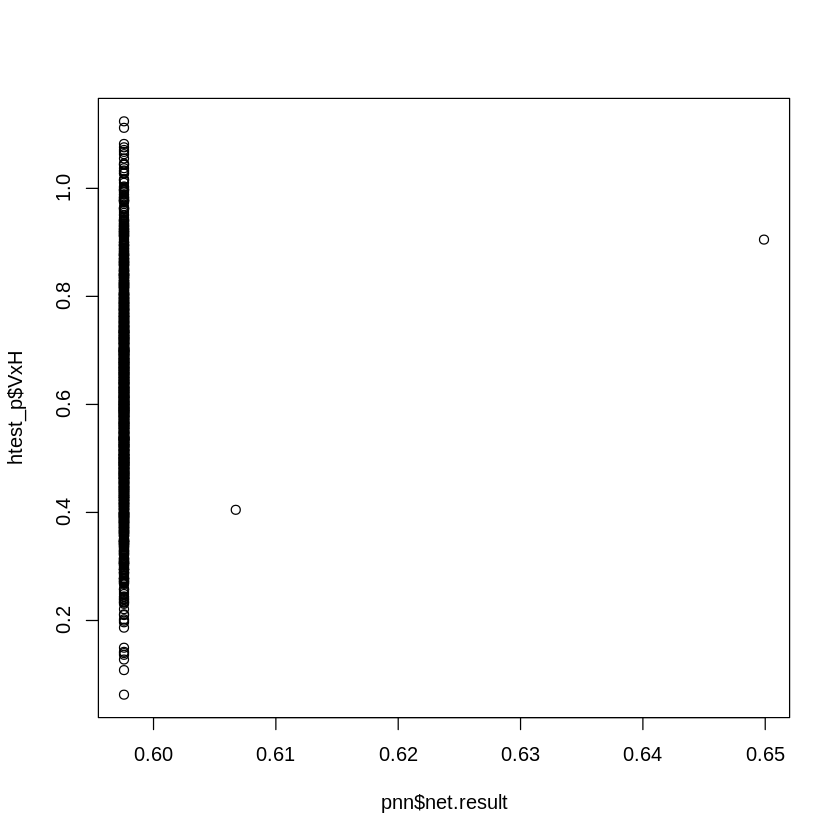

In [ ]:
plot(pnn$net.result,htest_p$VxH)

### Modifying some values to see new results 

First, we modify the theshold, which makes our neural network converge sooner. This looks much more reasonable than what we had before. 

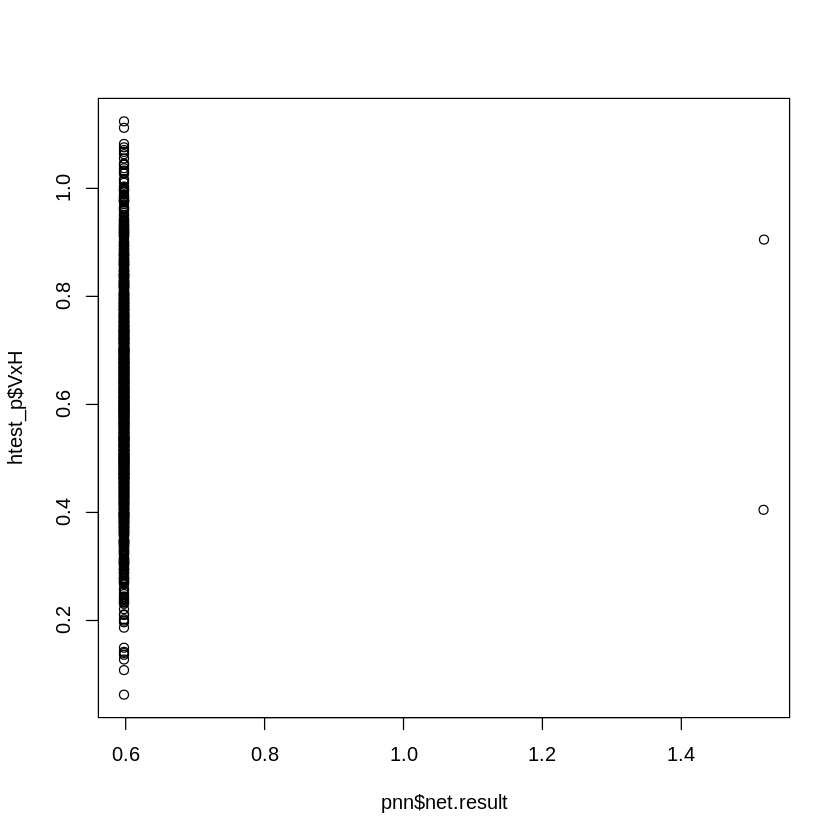

In [ ]:
nn <- neuralnet(formula = f,data = htrain_p,threshold=0.1)
pnn <- compute(nn,htest_p)
plot(pnn$net.result,htest_p$VxH)

Next, we modify the number of steps as well, which tells us the number of times we do the backpropagation process until deciding if the network converges or not. In this case, the network turned out to be a disaster. 

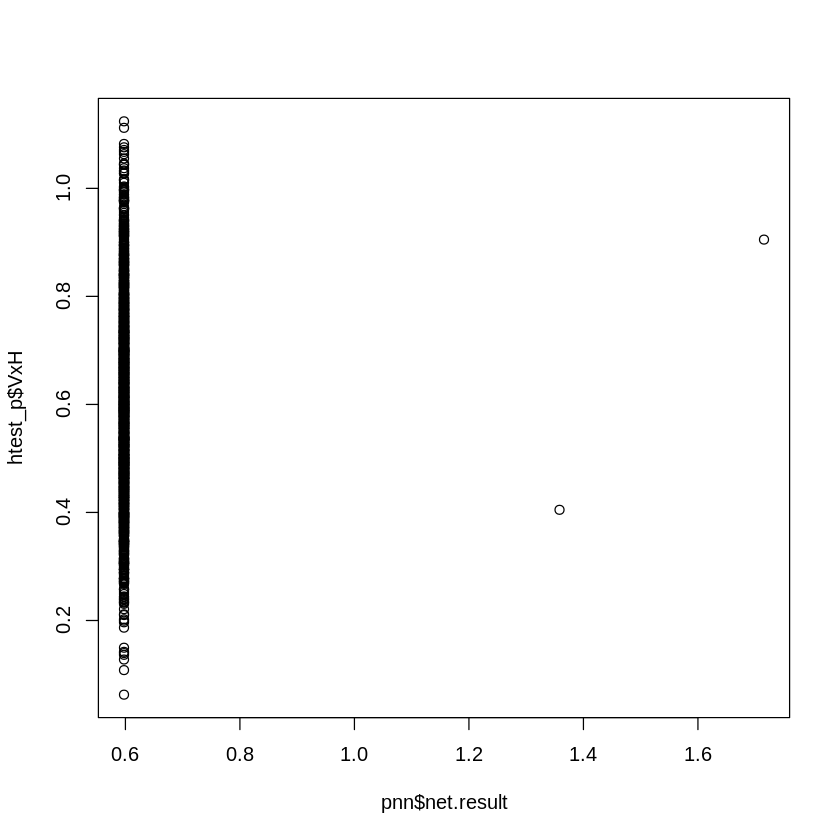

In [ ]:
nn <- neuralnet(formula = f,data = htrain_p,threshold=0.1,stepmax=1e6)
pnn <- compute(nn,htest_p)
plot(pnn$net.result,htest_p$VxH)

Before going for adding hidden layers and everything, it is nice to know that we can easily visualize our network with the commands of the following cell. This allows us to instantaneously undestand the architecture behind our predictive model. It doesn't work in Colab, but it surely does in RStudio. 

In [ ]:
plot(nn)

## Neural Network with hidden layers 

Hidden layers can easily be added with the hidden parameter. In this case, we will only add a simple hidden layer of 5 neurons. Again, we need to remind ourselves that results are random, and in one run we could get something completely useless while we can get a nice useful model in the next one. 

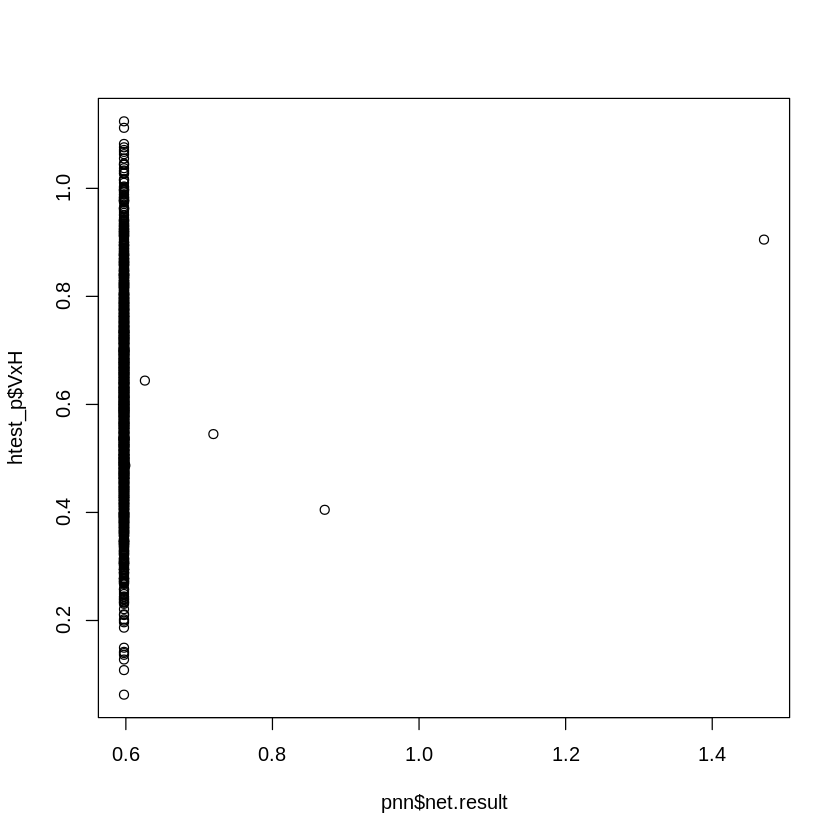

In [ ]:
nn <- neuralnet(formula = f,data = htrain_p,threshold=0.1,stepmax=1e6,hidden=5)
pnn <- compute(nn,htest_p)
plot(pnn$net.result,htest_p$VxH)

If we want to add more than a hidden layer, it is easily done by modifing the hidden parameter and using a vector instead. 

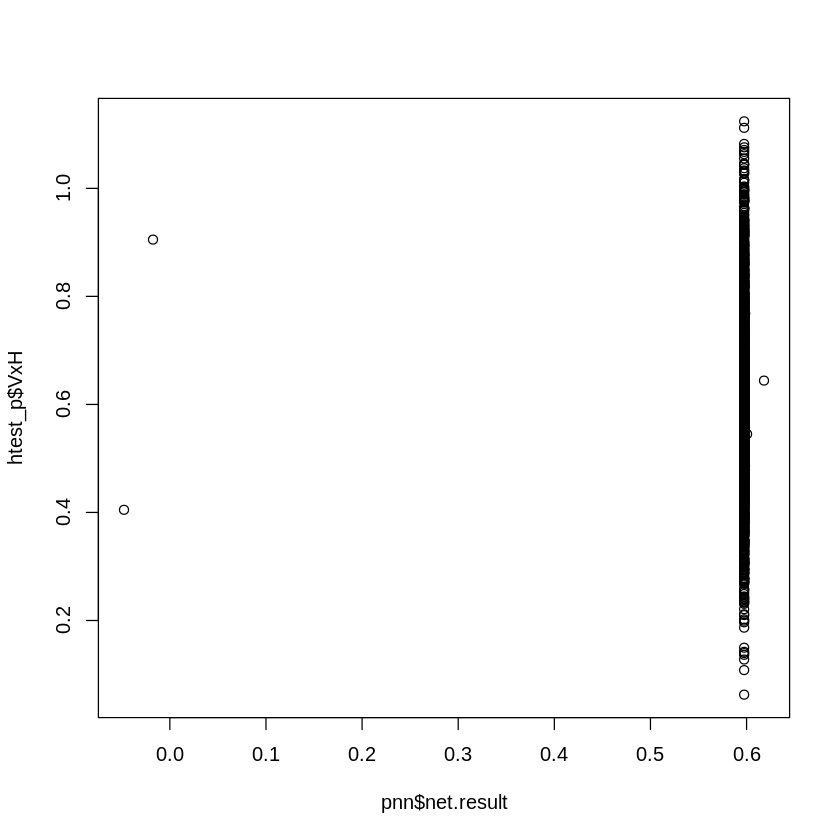

In [ ]:
nn <- neuralnet(formula = f,data = htrain_p,threshold=0.1,stepmax=1e6,hidden=c(5,5))
pnn <- compute(nn,htest_p)
plot(pnn$net.result,htest_p$VxH)

## Neural Networks and Repetitions 

So far, we have trained a few networks and we have been able to see that randomness plays a big part in the convergence to a useful solution. This is due to the random initialization, which may or may not make possible for us to arrive to an optimal (or at least a nice) solution. To mend this, neural networks are usually run a few times. This is precesily what we will do in this section by introducing the rep parameter for repetitions. 

In [ ]:
reps <- 20
nn <- neuralnet(formula = f,data = htrain_p,threshold=0.1,stepmax=1e6,hidden=c(5,5),rep=reps)
pnn <- compute(nn,htest_p)

Now we will keep the network that has minimal RMS (root mean square). 

In [ ]:
rmsmin <- 1e8
for(i in 1:reps){
  if(length(nn[[11]][[i]])>0){ 
    pnn <- compute(nn,htest_p,rep=i)
    rms <- sqrt(sum((htest_p$VxH - pnn$net.result)**2))/(nrow(htest_p))
    if(rms < rmsmin){
      imin <- i
      rmsmin <- rms
      nnmin <- nn
      pnnmin <- pnn
    }
  }
}

Next, we plot the optimal network results along with the test results and we calculate the correlation coefficient, which also gives us an indicator for goodness of fit. 

0.8036712


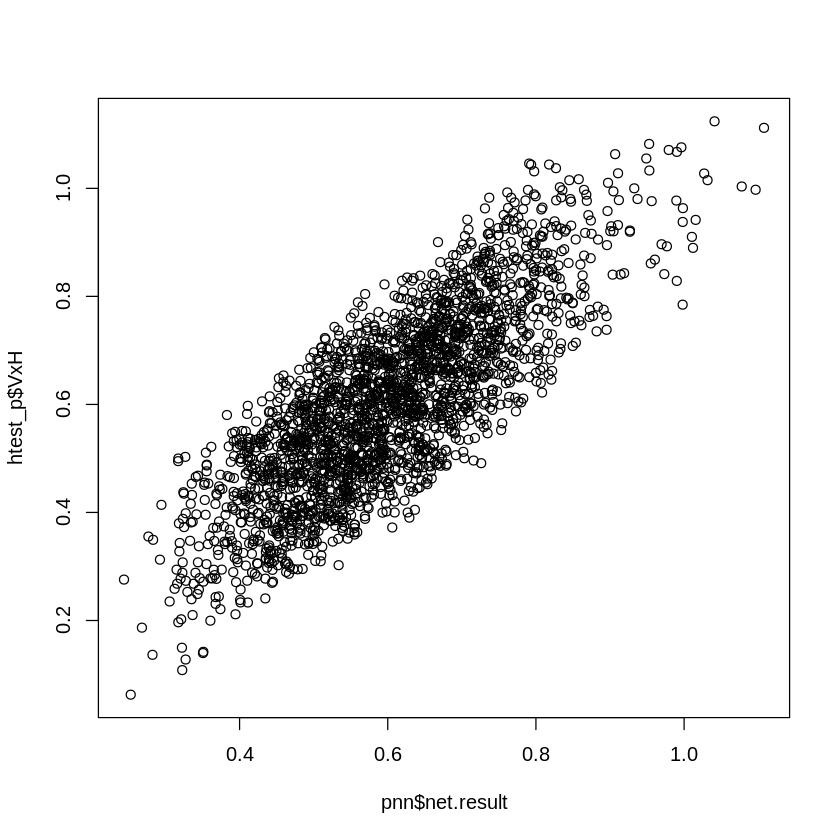

In [ ]:
pnn <- compute(nn,htest_p,rep=imin)
plot(pnn$net.result,htest_p$VxH)
cor(pnn$net.result,htest_p$VxH)

In [ ]:
rmsmin

[1] 0.002000158

## Value to the business, boosting performance
As always, we are now going to use a threshold to know which people to employ and which not to employ, and calculate a monetary value. We are thus going to select the neural network that has maximizes the value, as if we're getting an optimal stategy out of several possible ones. We get a different net as the last time, as it could happen.

In [ ]:
VTP <- 30000
VTN <- 0
VFP <- -60000
VFN <- 0


TP <- function(a,b,umbral) {length(which((a>umbral) & (b>umbral)))}
FP <- function(a,b,umbral) {length(which((a>umbral) & (b<umbral)))}
TN <- function(a,b,umbral) {length(which((a<umbral) & (b<umbral)))}
FN <- function(a,b,umbral) {length(which((a<umbral) & (b>umbral)))}

valor <- function(a,b,umbral){TP(a,b,umbral)*VTP+FP(a,b,umbral)*VFP+TN(a,b,umbral)*VTN+FN(a,b,umbral)*VFN}

In [ ]:
vmax <- 0
imax <- 0
for(i in 1:reps){
  if(length(nn[[11]][[i]])>0){ 
    pnn <- compute(nn,htest_p,rep=i)
    val <- valor(pnn$net.result,htest_p$VxH,0.75)
    if(val > vmax){
      imax <- i
      vmax <- val
      nnmax <- nn
      pnnmax <- pnn
    }
  }
}

0.8011526


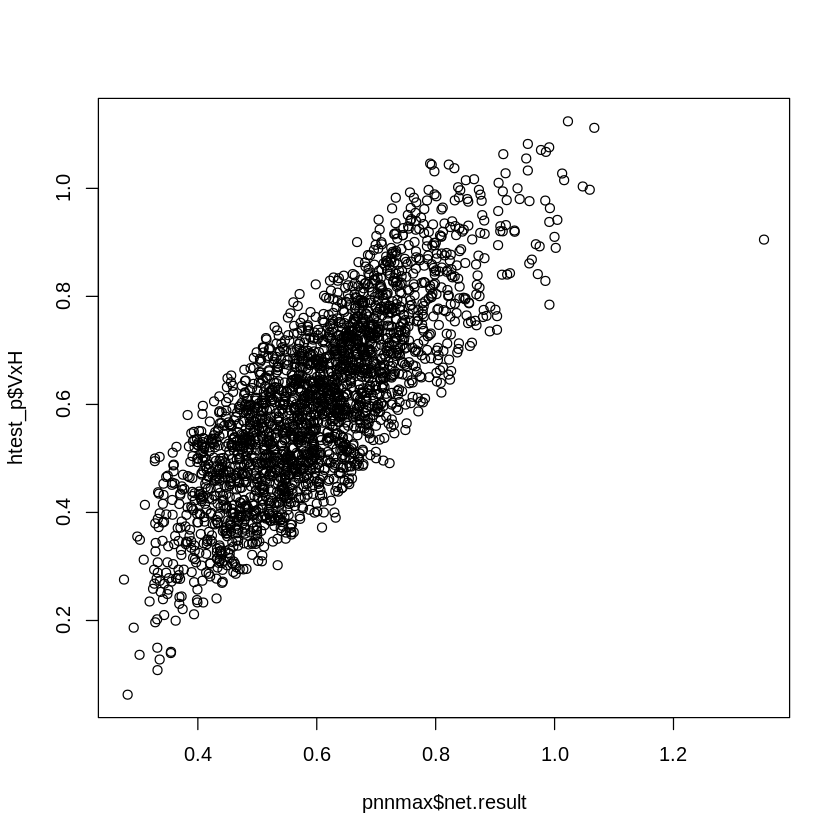

In [ ]:
plot(pnnmax$net.result,htest_p$VxH)
cor(pnnmax$net.result,htest_p$VxH)

We get a huge profit in this case after using the neural network. We could, like in most exercises, compare with more strategies such as hiring everyone and only hiring those who are good. 

In [ ]:
vmax

[1] 2700000

First, the hiring everyone stategy: 

In [ ]:
qTP <- length(which(htest_p$VxH>.75))
qFP <- nrow(htest_p)-qTP

vPiso <- qTP*VTP+qFP*VFP
print(vPiso)

[1] -104850000


Next, the perfect algorithm of only hiring those which will work:

In [ ]:
qTP <- length(which(htest_p$VxH>.75))
qTN <- nrow(htest_p$VxH)-qTP

vTecho <- qTP*VTP
print(vTecho)

[1] 13290000


## Adding another layer of hidden neurons

In [ ]:
reps <- 20
nn <- neuralnet(formula = f,data = htrain_p,threshold=0.1,stepmax=1e6,hidden=c(7,7,7),rep=reps)
pnn <- compute(nn,htest_p)

In [ ]:
VTP <- 30000
VTN <- 0
VFP <- -60000
VFN <- 0


TP <- function(a,b,umbral) {length(which((a>umbral) & (b>umbral)))}
FP <- function(a,b,umbral) {length(which((a>umbral) & (b<umbral)))}
TN <- function(a,b,umbral) {length(which((a<umbral) & (b<umbral)))}
FN <- function(a,b,umbral) {length(which((a<umbral) & (b>umbral)))}

valor <- function(a,b,umbral){TP(a,b,umbral)*VTP+FP(a,b,umbral)*VFP+TN(a,b,umbral)*VTN+FN(a,b,umbral)*VFN}

In [ ]:
vmax <- 0
imax <- 0
for(i in 1:reps){
  if(length(nn[[11]][[i]])>0){ 
    pnn <- compute(nn,htest_p,rep=i)
    val <- valor(pnn$net.result,htest_p$VxH,0.75)
    if(val > vmax){
      imax <- i
      vmax <- val
      nnmax <- nn
      pnnmax <- pnn
    }
  }
}

In [ ]:
plot(pnnmax$net.result,htest_p$VxH)
cor(pnnmax$net.result,htest_p$VxH)